## Title
Examining the Effects of Alcohol and Sulfur Dioxide Contents on the Quality of Red Wine

## Introduction
Red wine is not just any beverage. With physiological benefits, red wine can prevent heart disease and contains antioxidants. Although the drunk experience derives from alcohol content, red wine contains sulfur dioxide that may affect the respiratory system but stall oxidation and microbial spoilage and alcohol density that calculates how much alcohol is in a given volume. Inspired by the aforementioned research, we extracted a Wine Quality Data Set for a Portuguese red wine variant, Vinho Verde, the sample for the general red wine. Hence, we aim to answer this question in our classification project: Do alcohol, sulfur dioxide, and density affect the quality of red wine? 

## Preliminary exploratory data analysis

In [185]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

In [186]:
# this is the untidy data set 

redwine <- read_delim("data/winequality-red.csv", delim = ";")
redwine

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


In [187]:
good_redwine <- redwine %>%
    filter(quality > 5) %>%
    mutate(quality = "good")
bad_redwine <- redwine %>%
    filter(quality <= 5) %>%
    mutate(quality = "bad") 
redwine_new <- rbind(good_redwine, bad_redwine)
redwine_new

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.725,0.20,7.8,0.073,29,79,0.99770,3.29,0.54,9.2,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,bad


In [188]:
glimpse(redwine_new)

Rows: 1,599
Columns: 12
$ `fixed acidity`        <dbl> 11.2, 7.3, 7.8, 8.5, 7.9, 8.9, 6.9, 7.8, 6.9, …
$ `volatile acidity`     <dbl> 0.280, 0.650, 0.580, 0.280, 0.320, 0.220, 0.40…
$ `citric acid`          <dbl> 0.56, 0.00, 0.02, 0.56, 0.51, 0.48, 0.14, 0.00…
$ `residual sugar`       <dbl> 1.9, 1.2, 2.0, 1.8, 1.8, 1.8, 2.4, 2.0, 2.5, 1…
$ chlorides              <dbl> 0.075, 0.065, 0.073, 0.092, 0.341, 0.077, 0.08…
$ `free sulfur dioxide`  <dbl> 17, 15, 9, 35, 17, 29, 21, 8, 22, 40, 5, 3, 13…
$ `total sulfur dioxide` <dbl> 60, 21, 18, 103, 56, 60, 40, 16, 37, 83, 18, 1…
$ density                <dbl> 0.9980, 0.9946, 0.9968, 0.9969, 0.9969, 0.9968…
$ pH                     <dbl> 3.16, 3.39, 3.36, 3.30, 3.04, 3.39, 3.43, 3.38…
$ sulphates              <dbl> 0.58, 0.47, 0.57, 0.75, 1.08, 0.53, 0.63, 0.59…
$ alcohol                <dbl> 9.8, 10.0, 9.5, 10.5, 9.2, 9.4, 9.7, 9.8, 10.6…
$ quality                <chr> "good", "good", "good", "good", "good", "good"…


In [189]:
#Using glimpse function, we see that the 'quality' variable is of type character. 
#We change this to type factor

redwine_newfct <- redwine_new %>%
    mutate(quality = as_factor(quality))
    glimpse(redwine_newfct)

Rows: 1,599
Columns: 12
$ `fixed acidity`        <dbl> 11.2, 7.3, 7.8, 8.5, 7.9, 8.9, 6.9, 7.8, 6.9, …
$ `volatile acidity`     <dbl> 0.280, 0.650, 0.580, 0.280, 0.320, 0.220, 0.40…
$ `citric acid`          <dbl> 0.56, 0.00, 0.02, 0.56, 0.51, 0.48, 0.14, 0.00…
$ `residual sugar`       <dbl> 1.9, 1.2, 2.0, 1.8, 1.8, 1.8, 2.4, 2.0, 2.5, 1…
$ chlorides              <dbl> 0.075, 0.065, 0.073, 0.092, 0.341, 0.077, 0.08…
$ `free sulfur dioxide`  <dbl> 17, 15, 9, 35, 17, 29, 21, 8, 22, 40, 5, 3, 13…
$ `total sulfur dioxide` <dbl> 60, 21, 18, 103, 56, 60, 40, 16, 37, 83, 18, 1…
$ density                <dbl> 0.9980, 0.9946, 0.9968, 0.9969, 0.9969, 0.9968…
$ pH                     <dbl> 3.16, 3.39, 3.36, 3.30, 3.04, 3.39, 3.43, 3.38…
$ sulphates              <dbl> 0.58, 0.47, 0.57, 0.75, 1.08, 0.53, 0.63, 0.59…
$ alcohol                <dbl> 9.8, 10.0, 9.5, 10.5, 9.2, 9.4, 9.7, 9.8, 10.6…
$ quality                <fct> good, good, good, good, good, good, good, good…


In [190]:
#To check and see exactly what levels we have in the 'quality' column, we use  the 'levels' function. 
#By doing so, we verify that our desired classes of 'good' and 'bad' are present. This is shown below. 

redwine_newfct %>%
    pull(quality) %>%
    levels()

[1] "good" "bad"

In [191]:
redwine_num_obs <- nrow(redwine_newfct) 
redwine_newfct %>%
    group_by(quality) %>%
    summarize(count = n(),
             percentage = n() / redwine_num_obs * 100)

`summarise()` ungrouping output (override with `.groups` argument)



quality,count,percentage
<fct>,<int>,<dbl>
good,855,53.47092
bad,744,46.52908


From this, we see that more wines are good than bad. The difference is not significant (~6.9%), suggesting that we will have to inspect the data set closer. 

In [192]:
names(redwine_newfct)

[1] "fixed acidity"        "volatile acidity"     "citric acid"         
 [4] "residual sugar"       "chlorides"            "free sulfur dioxide" 
 [7] "total sulfur dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

In [193]:
#The following code indicates which predictor variables is best fit for this classification project. 
#Those with three asterisks implies a possibly better trend

mod <- glm(quality ~ ., data = redwine_newfct, family = "binomial")

In [194]:
summary(mod)


Call:
glm(formula = quality ~ ., family = "binomial", data = redwine_newfct)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3142  -0.8300  -0.3105   0.8387   3.4025  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -42.949948  79.473979  -0.540  0.58890    
`fixed acidity`         -0.135980   0.098483  -1.381  0.16736    
`volatile acidity`       3.281694   0.488214   6.722 1.79e-11 ***
`citric acid`            1.274347   0.562730   2.265  0.02354 *  
`residual sugar`        -0.055326   0.053770  -1.029  0.30351    
chlorides                3.915713   1.569298   2.495  0.01259 *  
`free sulfur dioxide`   -0.022220   0.008236  -2.698  0.00698 ** 
`total sulfur dioxide`   0.016394   0.002882   5.688 1.29e-08 ***
density                 50.932385  81.148745   0.628  0.53024    
pH                       0.380608   0.720203   0.528  0.59717    
sulphates               -2.795107   0.452184  -6.181 6.36e-10 ***
a

In [195]:
#This is our unscaled training data set

set.seed(2402)

redwine_split <- initial_split(redwine_newfct, prop = 0.6, strata = quality)
redwine_train <- training(redwine_split)
redwine_test <- testing (redwine_split)

redwine_train

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.1,0.715,0.10,2.6,0.053,13,27,0.99362,3.57,0.50,11.9,bad
6.2,0.460,0.29,2.1,0.074,32,98,0.99578,3.33,0.62,9.8,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad


In [196]:
#We renamed the columns of the redwine_recipe dataset so that the column names use underscores

redwine_train <- redwine_train %>%
rename(fixed_acidity = "fixed acidity",
      volatile_acidity = "volatile acidity",
      citric_acid = "citric acid",
      residual_sugar = "residual sugar",
      free_sulfur_dioxide = "free sulfur dioxide",
      total_sulfur_dioxide = "total sulfur dioxide")
redwine_train

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.1,0.715,0.10,2.6,0.053,13,27,0.99362,3.57,0.50,11.9,bad
6.2,0.460,0.29,2.1,0.074,32,98,0.99578,3.33,0.62,9.8,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad


In [197]:
#This is the summary data set of the tidy redwine data set. 
#Each value represent the mean value of all the values in that column. 

redwine_summary <- redwine_train %>%
map_df(mean)

redwine_summary 

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.231667,0.5295937,0.2595208,2.534531,0.0878375,15.98021,46.52031,0.9967174,3.318,0.6607812,10.41884,NA


Using the training data set values, we establish the following graphs by keeping 'alcohol' on the y-axis and changing the x-axis. We hypothesized that alcohol is a good predictor variable from the' mod' table. Hence, we varied the x-axis to observe whether variables exhibit a good pattern when 'alcohol' is plotted against them. 

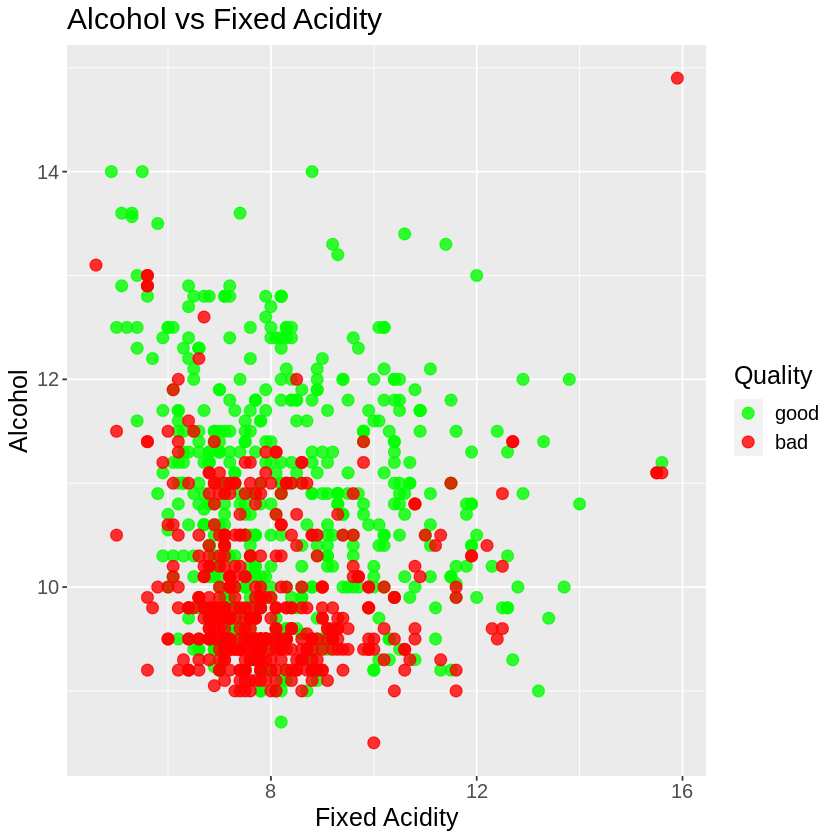

In [198]:
fixed_acidity_alcohol <- redwine_train %>%
    ggplot(aes(x = fixed_acidity, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Fixed Acidity", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Fixed Acidity")
fixed_acidity_alcohol

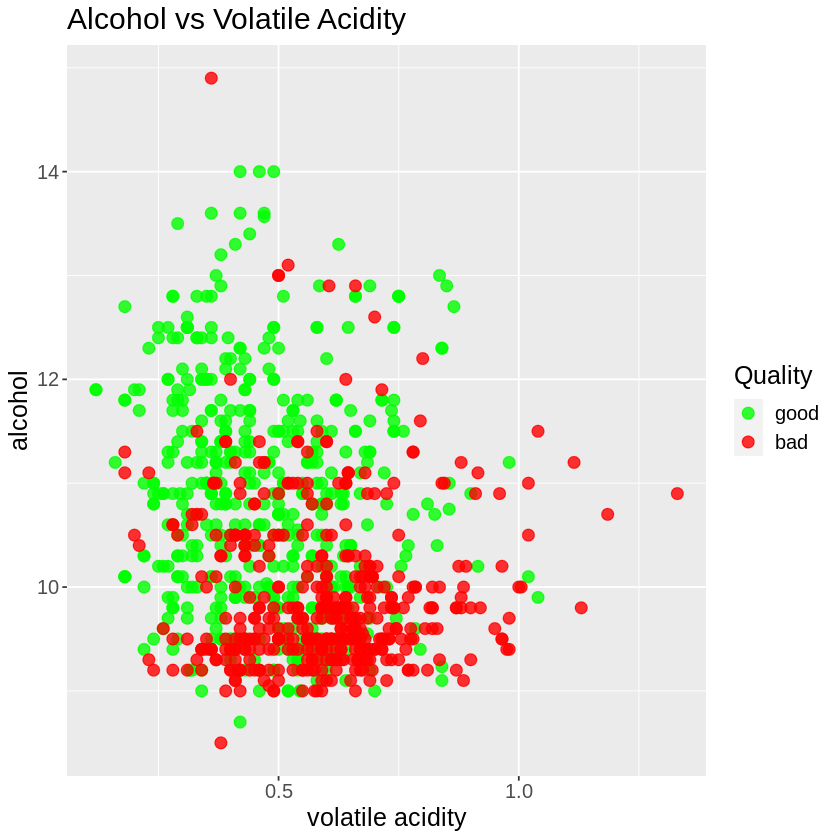

In [199]:
volatile_acidity_alcohol <- redwine_train %>%
    ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "volatile acidity", 
         y = "alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Volatile Acidity")
volatile_acidity_alcohol

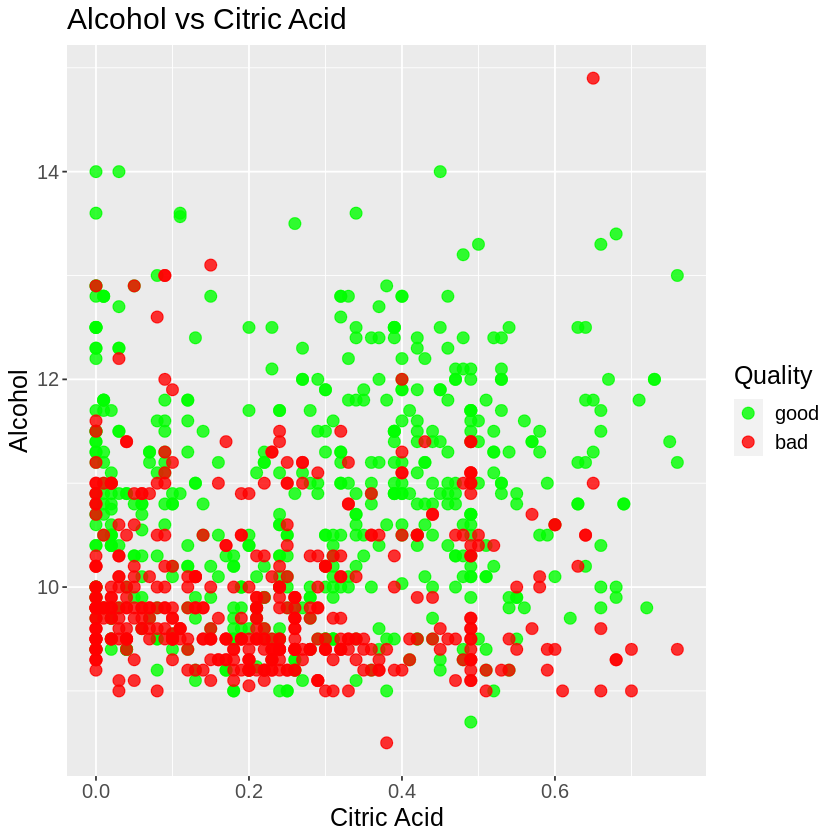

In [200]:
citric_acid_alcohol <- redwine_train %>%
    ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Citric Acid", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Citric Acid")
citric_acid_alcohol

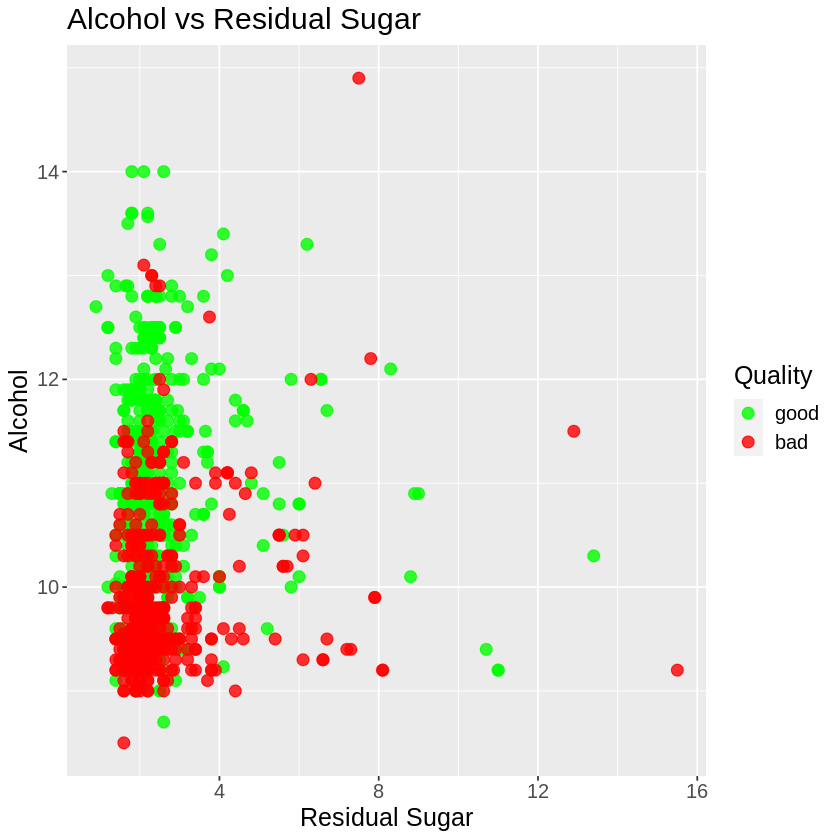

In [201]:
residual_sugar_alcohol <- redwine_train %>%
    ggplot(aes(x = residual_sugar, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Residual Sugar", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Residual Sugar")
residual_sugar_alcohol

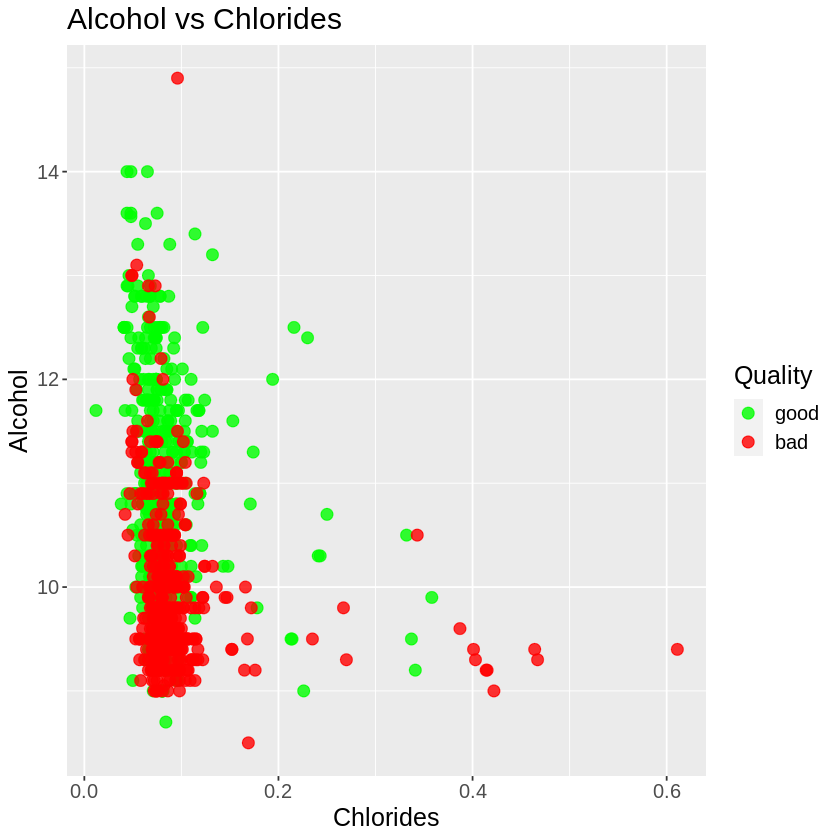

In [202]:
chlorides_alcohol <- redwine_train %>%
    ggplot(aes(x = chlorides, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Chlorides", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Chlorides")
chlorides_alcohol

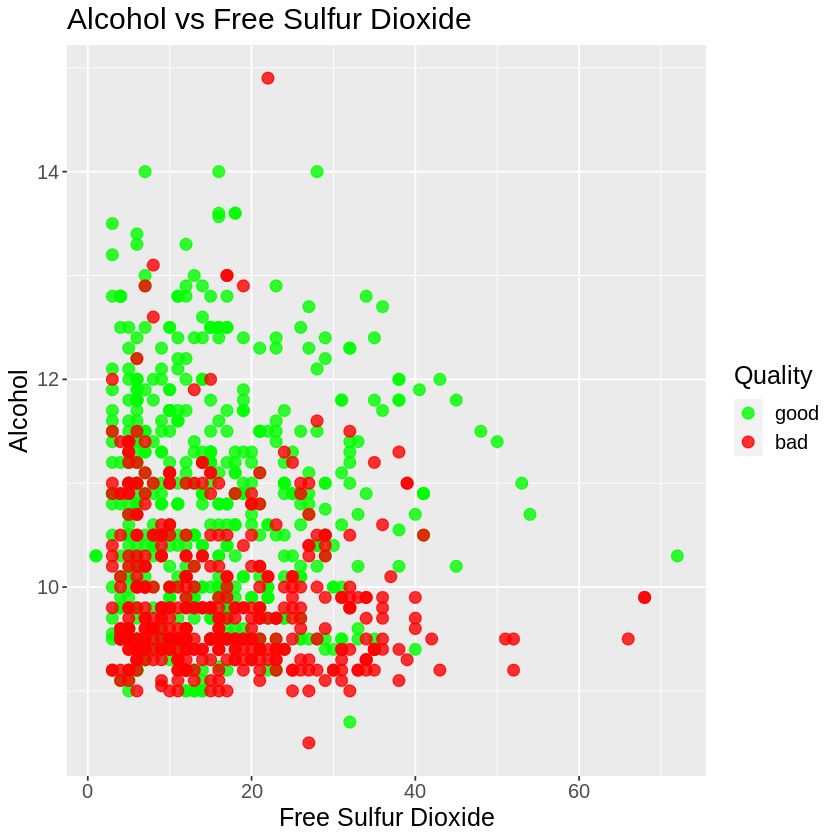

In [203]:
free_sulfur_dioxide_alcohol <- redwine_train %>%
    ggplot(aes(x = free_sulfur_dioxide, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Free Sulfur Dioxide", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Free Sulfur Dioxide")
free_sulfur_dioxide_alcohol

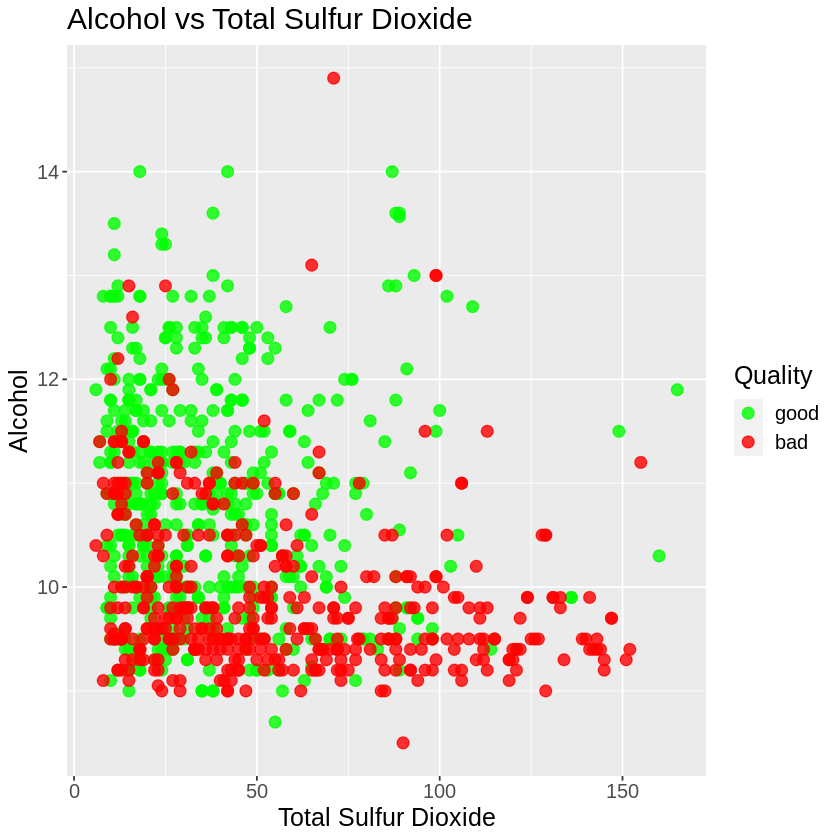

In [204]:
total_sulfur_dioxide_alcohol <- redwine_train %>%
    ggplot(aes(x = total_sulfur_dioxide, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Total Sulfur Dioxide", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Total Sulfur Dioxide")
total_sulfur_dioxide_alcohol

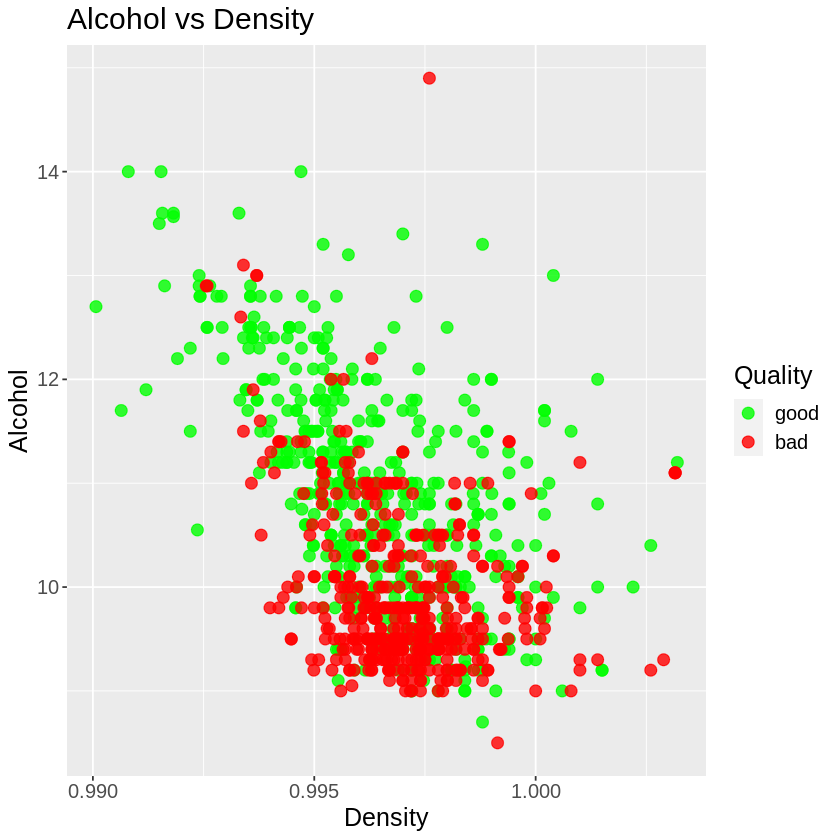

In [205]:
density_alcohol <- redwine_train %>%
    ggplot(aes(x = density, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Density", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15))+
ggtitle("Alcohol vs Density")
density_alcohol

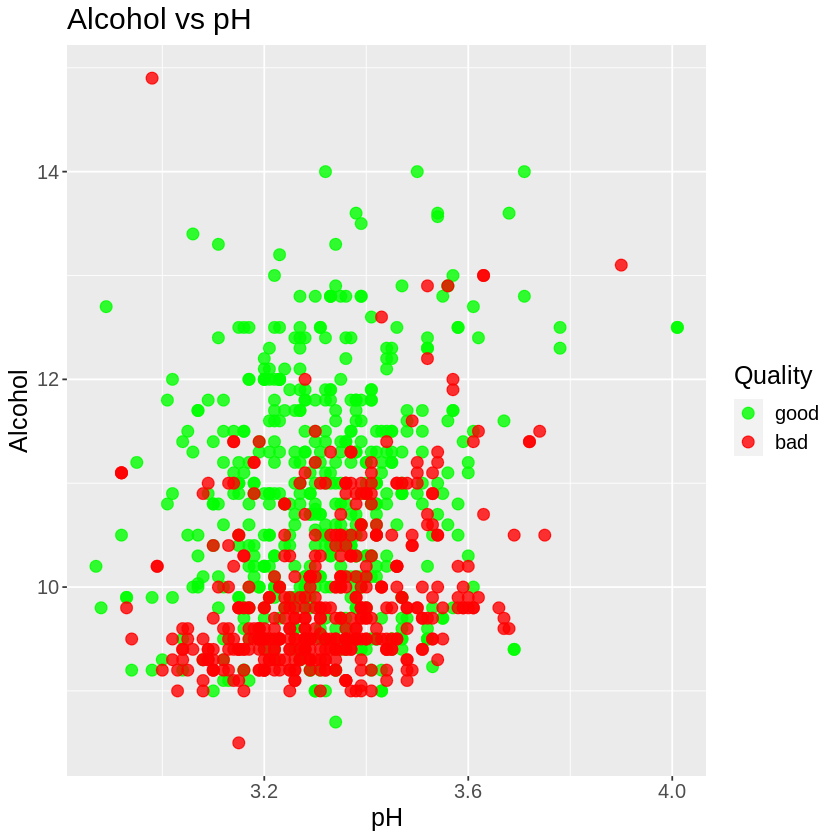

In [206]:
pH_alcohol <- redwine_train %>%
    ggplot(aes(x = pH, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "pH", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs pH")

pH_alcohol

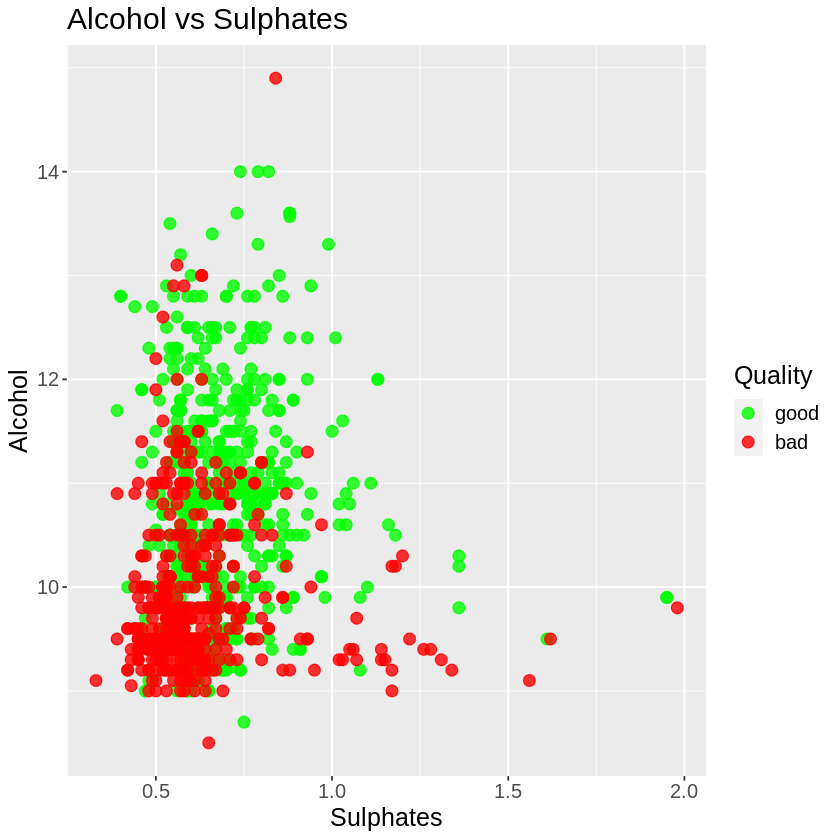

In [207]:
sulphates_alcohol <- redwine_train %>%
    ggplot(aes(x = sulphates, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Sulphates", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Sulphates")
sulphates_alcohol

Additionally, we used two other variables on the y-axis to observe any existing strong relationship between any two x-variables.

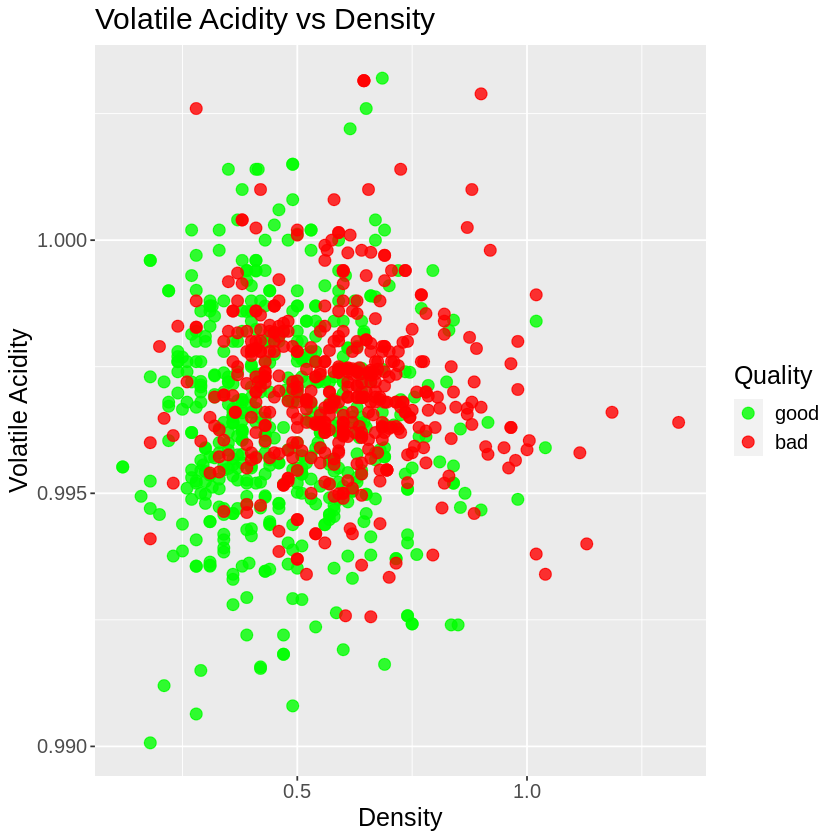

In [208]:
volatile_acidity_density <- redwine_train %>%
    ggplot(aes(x = volatile_acidity, y = density, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Density", 
         y = "Volatile Acidity",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Volatile Acidity vs Density")

volatile_acidity_density

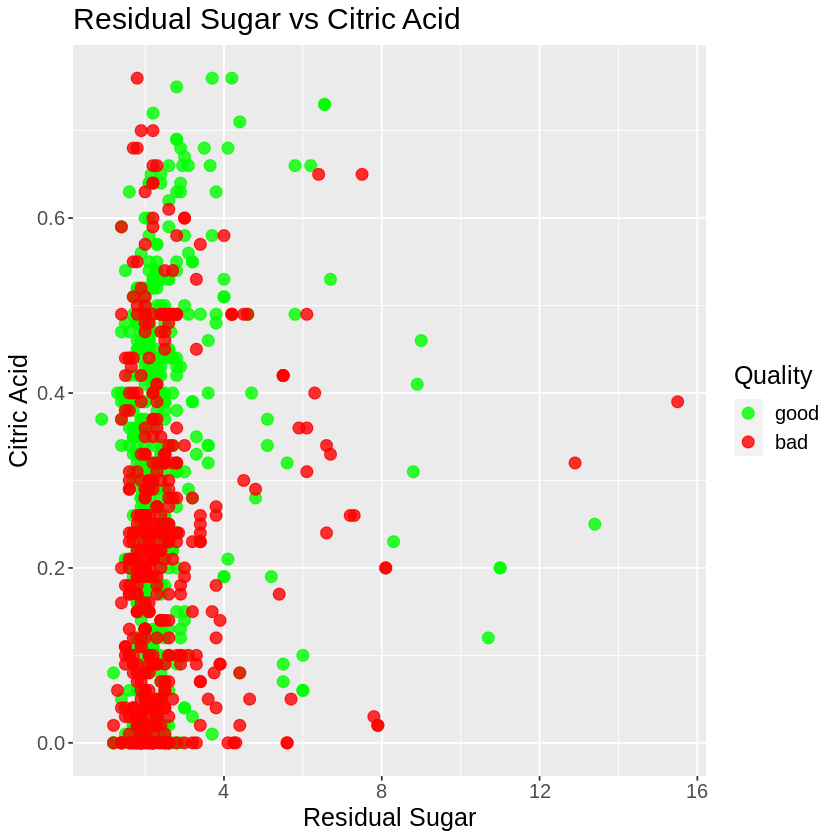

In [209]:
residual_sugar_citric_acid <- redwine_train %>%
    ggplot(aes(x = residual_sugar, y = citric_acid, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Residual Sugar", 
         y = "Citric Acid",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Residual Sugar vs Citric Acid")
residual_sugar_citric_acid

From the graphs above, we argue that a good trend is observed when 'total sulfur dioxide' and 'density' are each plotted against 'alcohol'. Notably, these three variables exhibit a strong to a moderate pattern, where a significant portion of the good-quality wines are clustered in the upper left corner, and the bad-quality wines are concentrated in the lower-left corner. Therefore, we decided to use 'alcohol,' 'total sulfur dioxide,' and 'density' as predicting variables.

A weak trend is observed for all other variables since most red and green plots overlap. 

## Methods
When performing our predictive analysis, we first scale our training dataset to better visually predict the quality of an unknown wine. We do this by using the recipe function, where quality is the categorial label variable and 'alcohol,' 'total sulfur dioxide,' and 'density' are predictors. 

We will conduct a 5-fold cross-validation and tune the model to improve our models' accuracy to collect the workflow's metrics. We then plot the k-values against accuracy to obtain the k-value with the highest accuracy. Using this k-value and specifying 'weight_func = rectangular,' we recreate our knn-spec function. Subsequently, the model's accuracy will be tested using our testing data set, and if the accuracy is above 80, the model will be used to predict the quality of the unknown observation. Otherwise, we will use fewer predictors then repeat the process until the accuracy exceeds 80.

Finally, we plan on using a scatter plot because there is a correlation between the x and y continuous variables. The plots representing good-quality wine will be shown in green, whereas the bad-quality wines will be shown in red. In this way, we aim to make our graph as colour-friendly and interpretable as possible.  

In [210]:
#Verify the training set to check if the strata was maintained for redwine_training
data_proportions <- redwine_train %>%
    group_by(quality) %>%
    summarize(n = n()) %>%
    mutate(percent = 100*n/nrow(redwine_train))
data_proportions

`summarise()` ungrouping output (override with `.groups` argument)



quality,n,percent
<fct>,<int>,<dbl>
good,513,53.4375
bad,447,46.5625


We see that the proportion of good and bad in the "redwine_train" data set has preserved that of the original data set, as they share very similar percent for good and bad quality count.

In [211]:
redwine_train

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.1,0.715,0.10,2.6,0.053,13,27,0.99362,3.57,0.50,11.9,bad
6.2,0.460,0.29,2.1,0.074,32,98,0.99578,3.33,0.62,9.8,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6947582,5,0.01388701,Model01
6,accuracy,binary,0.6739571,5,0.02044170,Model02
11,accuracy,binary,0.7031188,5,0.01308799,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.7094722,5,0.02171109,Model18
91,accuracy,binary,0.7157061,5,0.02357559,Model19
96,accuracy,binary,0.7167369,5,0.02180796,Model20


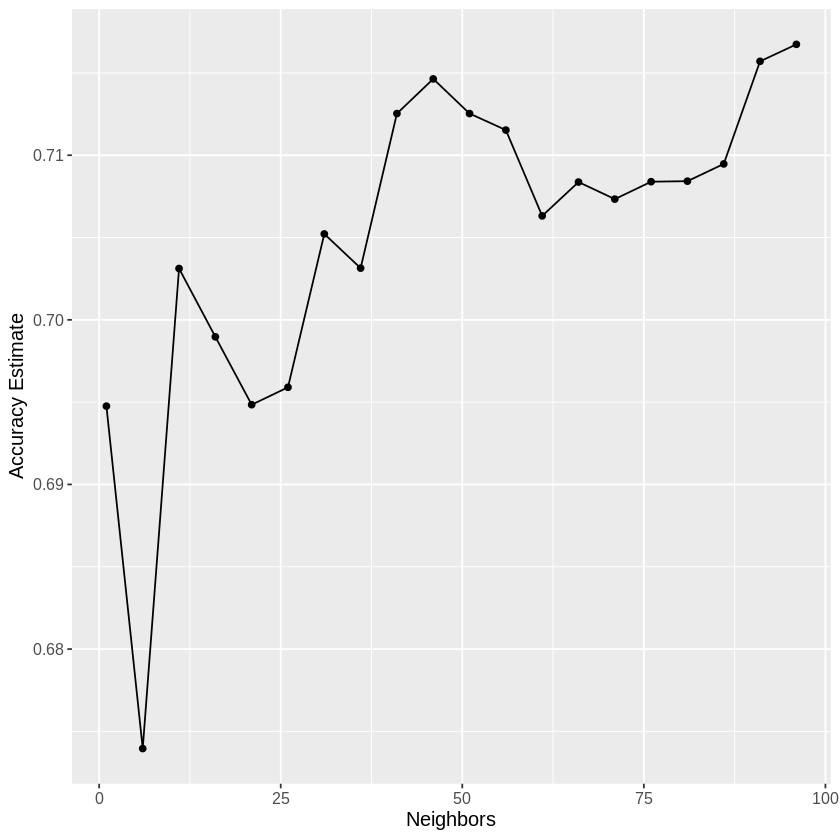

In [212]:
#Note: the step for creating the 60/40 split of the training data into a training and validation set has already been performed near the beginning of this project analysis
#Goal: Use multiple different train/validation splits to attain a good estimate of accuracy and determine an optimal K parameter to use

#Cross validation
redwine_vfold <- vfold_cv(redwine_train, v = 5, strata = quality)

#Preprocess the data using only the training set
redwine_recipe <- recipe(quality ~ alcohol + total_sulfur_dioxide + density,
                         data = redwine_train) %>%
    step_scale(all_predictors()) %>%   
    step_center(all_predictors())

#tune the model's K parameter
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#get a K value using tune and gridvals
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#create a workflow
knn_results<- workflow() %>%
    add_recipe(redwine_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = redwine_vfold, grid = k_vals) %>%

collect_metrics()

#determine the accuracy of the estimates
accuracies <- knn_results %>%
    filter(.metric == "accuracy")
accuracies

#create a plot of estimated accuracy vs the # of neighbors
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

In [218]:
#by printing the table for "accuracies," the highest mean value observed is for row 18 
#or, equivalently, when the K parameter is equal to 96. Note that it has a standard error
#of 0.0218 and a pure mean of 0.717. But due to standard error, this means that the mean 
#could be either 0.739 or 0.695, representing the notion of distance between our 
#predicted and true categorical variable values.
print(accuracies, n = 100)

# A tibble: 20 x 7
   neighbors .metric  .estimator  mean     n std_err .config
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>  
 1         1 accuracy binary     0.695     5  0.0139 Model01
 2         6 accuracy binary     0.674     5  0.0204 Model02
 3        11 accuracy binary     0.703     5  0.0131 Model03
 4        16 accuracy binary     0.699     5  0.0163 Model04
 5        21 accuracy binary     0.695     5  0.0173 Model05
 6        26 accuracy binary     0.696     5  0.0159 Model06
 7        31 accuracy binary     0.705     5  0.0137 Model07
 8        36 accuracy binary     0.703     5  0.0178 Model08
 9        41 accuracy binary     0.713     5  0.0185 Model09
10        46 accuracy binary     0.715     5  0.0197 Model10
11        51 accuracy binary     0.713     5  0.0161 Model11
12        56 accuracy binary     0.712     5  0.0194 Model12
13        61 accuracy binary     0.706     5  0.0179 Model13
14        66 accuracy binary     0.708     5  0.0191 Model14
15   

The model's highest accuracy obtained is 71.7% when predicting the quality of the unknown observation of red wine, classifying it as either good or bad quality based on the three predictor variables: alcohol, total sulfur dioxide, and density. 

NOTE TO SELF: Measurements will later be undertaken to see if this percentage accuracy can be raised to around 80%, but for now the data analysis will continue.

In [217]:
#Goal: Train our classifier based on the training set using the obtained optimal K 
#value of 86 to see if it can appropriately predict observations from a test set. 

#Preprocess the data using only the training set (same step as before, but iterated for readability)
redwine_recipe <- recipe(quality ~ alcohol + total_sulfur_dioxide + density,
                         data = redwine_train) %>%
    step_scale(all_predictors()) %>%   
    step_center(all_predictors())

#Train the classifier
knn2_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 86) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#Create the workflow
knn2_fit <- workflow() %>%
    add_recipe(redwine_recipe) %>%
    add_model(knn2_spec) %>%
    fit(data = redwine_train)
knn2_fit

#Predict the labels in the test set
redwine_test_predictions <- predict(knn2_fit, redwine_test) %>%
    bind_cols(redwine_test)
redwine_test_predictions

#Compute the accuracy
redwine_test_predictions %>%
    metrics(truth = quality, estimate = pred.clas) %>%
    filter(.metric == "accuracy") 

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~86, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2864583
Best kernel: rectangular
Best k: 86

ERROR: Error: The following required columns are missing: 'total_sulfur_dioxide'.


## Expected Outcomes and Significance
We expect to find that the quality of red wine increases as alcohol content increases but decreases as density and sulfur dioxide increase. If the previous statement is true, this may be applicable for red wine consumers searching for purer and better alcohol with lower intoxicating effects and harmful chemical content. This potential outcome raises a health concern for red wine consumers, leading to the question for winemakers: Is there a way to remove the need to use sulfur dioxide in wine and lower the density? 